## Libraries

The relevant libraries are imported. These include the numerical computation and plotting libraries.

Warnings that are occasionally generated when codes are ran are suppressed using the _"**ignore**"_ argument

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

import warnings
warnings.filterwarnings('ignore')

## Data exploration and preprocessing

Data preprocessing enables us to ensure the data completeness and duplication and have a glimpse of the summary of the data statistics.

In [2]:
df= pd.read_excel("C:/Users/Joshua Nsiah Turkson/Desktop/Joshua/Research/Publications/Machine Learning/IFT/H2 CO2_IFT ML/CH4_N2.xlsx", sheet_name = "All").drop(['CA', 'Carbon dioxide'], axis=1)

In [3]:
# First five instances
df.head()

,Pressure,Temperature,Salinity,Hydrogen,Nitrogen,Methane,Density difference,IFT
0,3.446429,30.0,0.34188,80,10,5,999.60,71.58
1,6.892857,30.0,0.34188,80,10,5,990.81,69.20
2,10.339286,30.0,0.34188,80,10,5,982.31,67.24
3,13.785714,30.0,0.34188,80,10,5,974.24,66.15
4,17.232143,30.0,0.34188,80,10,5,967.20,65.13


In [4]:
# Last five instances
df.tail()

,Pressure,Temperature,Salinity,Hydrogen,Nitrogen,Methane,Density difference,IFT
1662,0.344643,49.85,0.0,50,0,50,NaN,54.773
1663,2.757143,49.85,0.0,50,0,50,NaN,53.639
1664,5.514286,49.85,0.0,50,0,50,NaN,52.173
1665,8.271429,49.85,0.0,50,0,50,NaN,51.163
1666,11.028571,49.85,0.0,50,0,50,NaN,49.993


In [5]:
# Checking the number of null instances for all feature
df.isna().sum()

Pressure              0
Temperature           0
Salinity              0
Hydrogen              0
Nitrogen              0
Methane               0
Density difference    5
IFT                   0
dtype: int64

<Axes: >

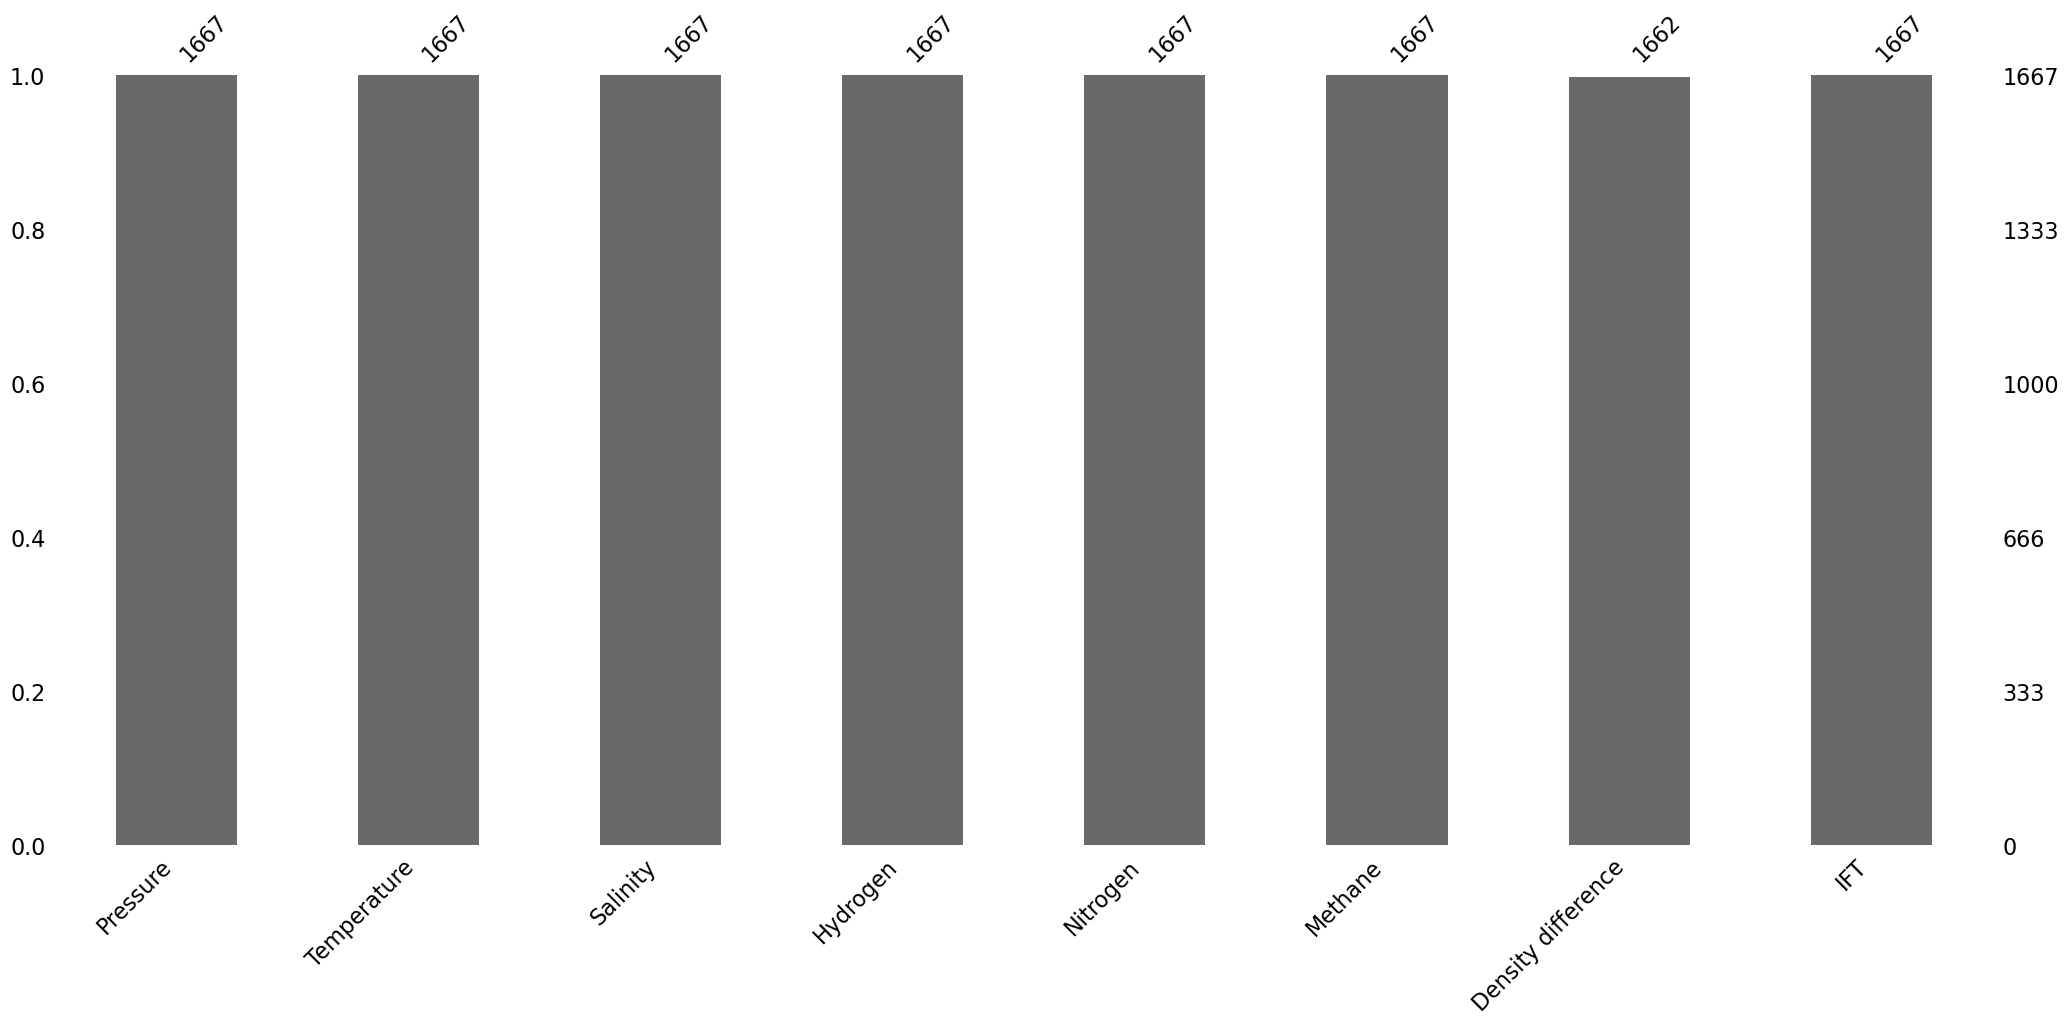

In [6]:
# Visual representation of null instances within dataset
msno.bar(df)
# Other visual representation such as msno.matrix(df), msno.heatmap(df), msno.dendrogram(df) can be employed

In [7]:
#Number of unique instances for the various features
df.nunique()

Pressure                12
Temperature              7
Salinity                 6
Hydrogen                 7
Nitrogen                 6
Methane                  9
Density difference    1583
IFT                   1274
dtype: int64

In [8]:
# Statistical summary of data
df.describe()

,Pressure,Temperature,Salinity,Hydrogen,Nitrogen,Methane,Density difference,IFT
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1662.000000,1667.000000
mean,11.963676,49.932364,1.762109,49.982004,17.546491,27.522496,995.528213,64.888477
std,5.945316,14.157587,1.121645,20.870887,21.540536,23.287285,46.499266,7.529087
min,0.344643,22.000000,0.000000,20.000000,0.000000,5.000000,835.610000,40.220000
25%,6.892857,40.000000,0.854701,30.000000,5.000000,5.000000,965.550000,59.920000
50%,10.339286,50.000000,1.709402,50.000000,5.000000,20.000000,997.725000,65.280000
75%,17.232143,60.000000,2.564103,70.000000,30.000000,50.000000,1031.500000,70.260000
max,20.678571,70.000000,3.418803,80.000000,70.000000,80.000000,1087.310000,85.920000


In [9]:
# Removing null values and generating the descriptive statistics again
df.dropna(inplace=True)
df.describe()

,Pressure,Temperature,Salinity,Hydrogen,Nitrogen,Methane,Density difference,IFT
count,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000
mean,11.982871,49.932611,1.767410,49.981949,17.599278,27.454874,995.528213,64.926203
std,5.940264,14.178879,1.119152,20.902276,21.551377,23.289582,46.499266,7.508278
min,1.033929,22.000000,0.341880,20.000000,0.000000,5.000000,835.610000,40.220000
25%,6.892857,40.000000,0.854701,30.000000,5.000000,5.000000,965.550000,59.942500
50%,10.339286,50.000000,1.709402,50.000000,5.000000,20.000000,997.725000,65.300000
75%,17.232143,60.000000,2.564103,70.000000,30.000000,50.000000,1031.500000,70.277500
max,20.678571,70.000000,3.418803,80.000000,70.000000,80.000000,1087.310000,85.920000


## Correlation matrix

The common correlation matrices that are utilized in assessing relationship between variables include 
- Pearson
- Spearman
- Kendall

Unlike the Pearson correlation, the Sperman and Kendall correlations successfully identify the relationship between features and target when data is not normally distributed. 

In [10]:
# # Pearson correlation matrix
# corrmat_pearson = df.corr(method='pearson')

# # Masking the upper triangle
# mask = np.triu(np.ones_like(corrmat_pearson, dtype=bool))
# corrmat_pearson = corrmat_pearson.mask(mask)

# # Font type
# plt.rcParams.update({'font.family': 'Times New Roman'})

# # Figure size
# plt.figure(figsize=(15, 10))

# # Font properties
# ax = sns.heatmap(corrmat_pearson, annot=True, cmap='coolwarm', annot_kws={"fontsize": 22, "fontweight": 'bold'})

# # Color bar poperties
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=20)
# for label in cbar.ax.get_yticklabels():
#     label.set_fontweight('bold')

# #Plot customization
# plt.title(r"(A) Pearson's r correlation", fontsize=30, fontweight='bold')
# plt.xlabel('Features', fontsize=24, fontweight='bold')
# plt.ylabel('Features', fontsize=24, fontweight='bold')
# plt.xticks(rotation = 90, fontsize=22)
# plt.yticks(rotation = 0, fontsize=22)

# #Save figure
# plt.savefig('Pearson Correlation Matrix.png', bbox_inches='tight', pad_inches=0.1)

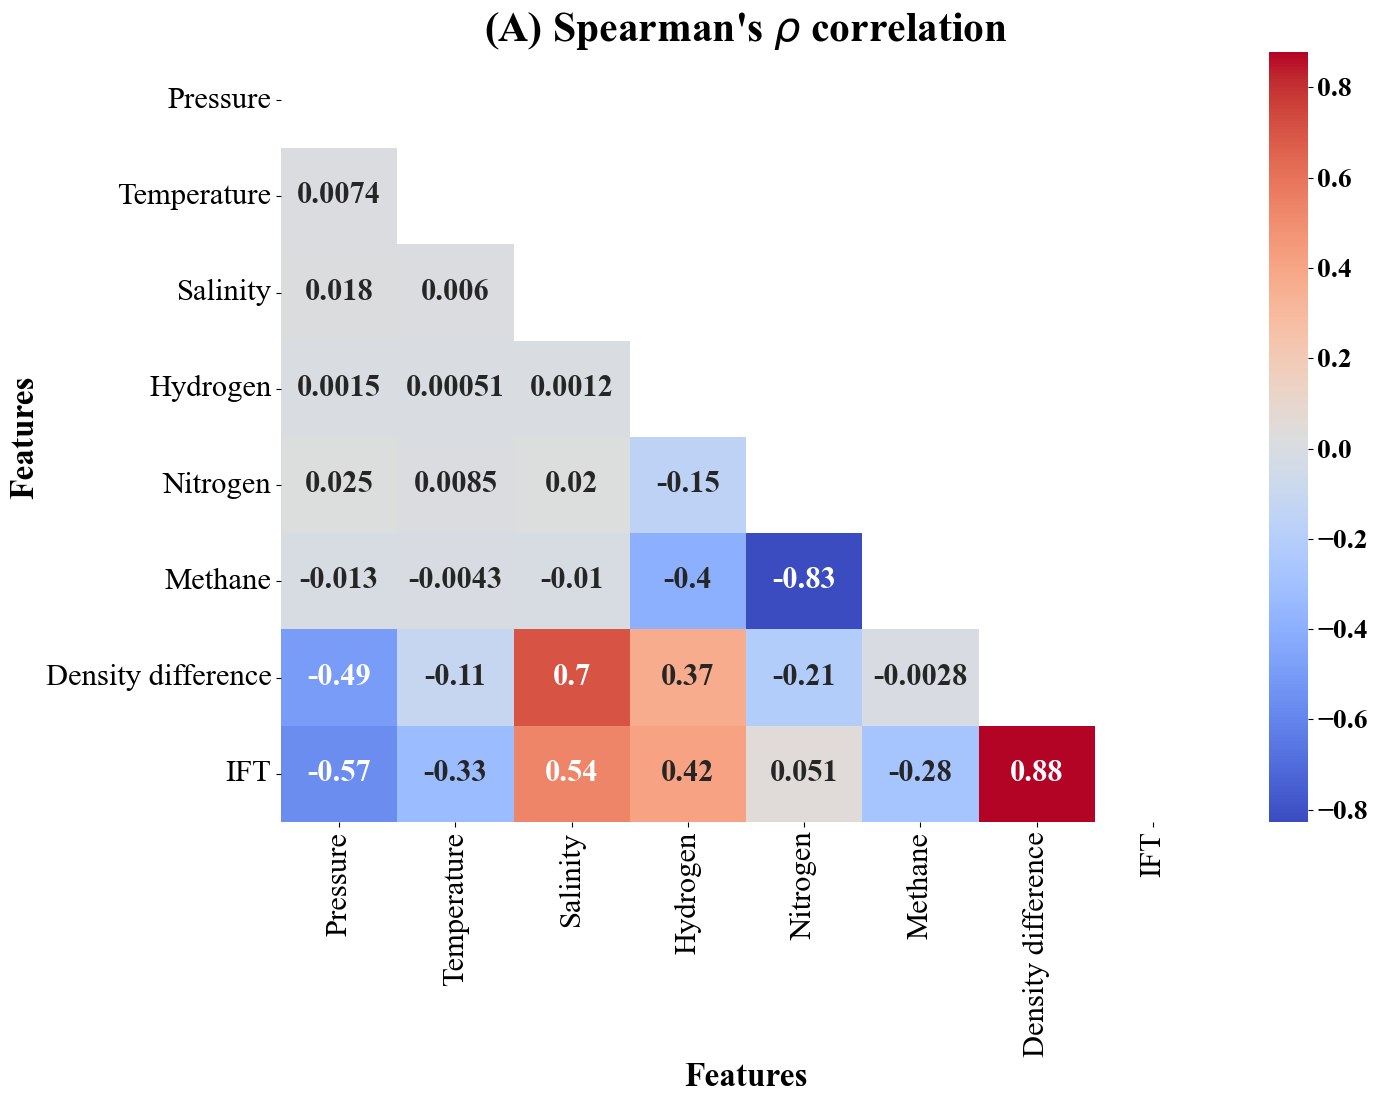

In [11]:
# Spearman correlation matrix
corrmat_spearman = df.corr(method='spearman')

# # Masking the upper triangle
mask = np.triu(np.ones_like(corrmat_spearman, dtype=bool))
corrmat_spearman = corrmat_spearman.mask(mask)

# Font type
plt.rcParams.update({'font.family': 'Times New Roman'})

# Figure size
plt.figure(figsize=(15, 10))

# Font properties
ax = sns.heatmap(corrmat_spearman, annot=True, cmap='coolwarm', annot_kws={"fontsize": 22, "fontweight": 'bold'})

# Color bar poperties
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

#Plot customization
plt.title(r"(A) Spearman's $\rho$ correlation", fontsize=30, fontweight='bold')
plt.xlabel('Features', fontsize=24, fontweight='bold')
plt.ylabel('Features', fontsize=24, fontweight='bold')
plt.xticks(rotation = 90, fontsize=22)
plt.yticks(rotation = 0, fontsize=22)

#Save figure
plt.savefig('Spearman Correlation Matrix.png', bbox_inches='tight', pad_inches=0.1)

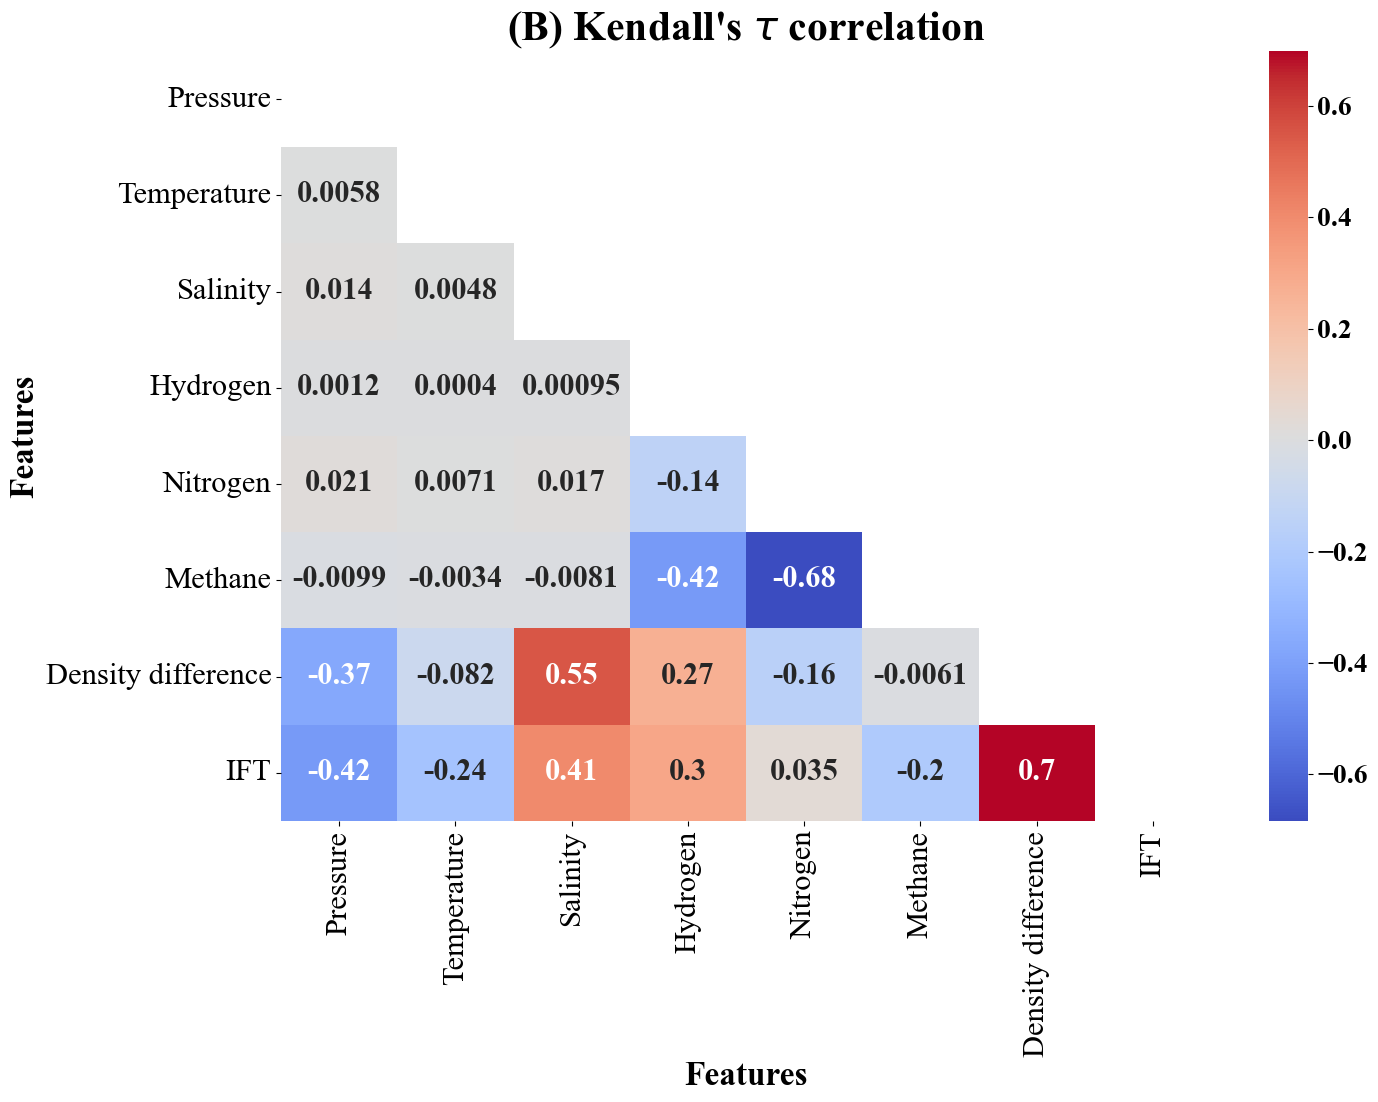

In [12]:
# Kendall correlation matrix
corrmat_kendall = df.corr(method='kendall')

# # Masking the upper triangle
mask = np.triu(np.ones_like(corrmat_kendall, dtype=bool))
corrmat_kendall = corrmat_kendall.mask(mask)

# Font type
plt.rcParams.update({'font.family': 'Times New Roman'})

# Figure size
plt.figure(figsize=(15, 10))

# Font properties
ax = sns.heatmap(corrmat_kendall, annot=True, cmap='coolwarm', annot_kws={"fontsize": 22, "fontweight": 'bold'})

# Color bar poperties
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

#Plot customization
plt.title(r"(B) Kendall's $\tau$ correlation", fontsize=30, fontweight='bold')
plt.xlabel('Features', fontsize=24, fontweight='bold')
plt.ylabel('Features', fontsize=24, fontweight='bold')
plt.xticks(rotation = 90, fontsize=22)
plt.yticks(rotation = 0, fontsize=22)

#Save figure
plt.savefig('Kendall Correlation Matrix.png', bbox_inches='tight', pad_inches=0.1)

## Pairplot distribution

The pairplot distribution provides visual insights into the feature-feature and feature-target relationships. Thus, linear and non-linear trends can be ascertained from this particular plot.

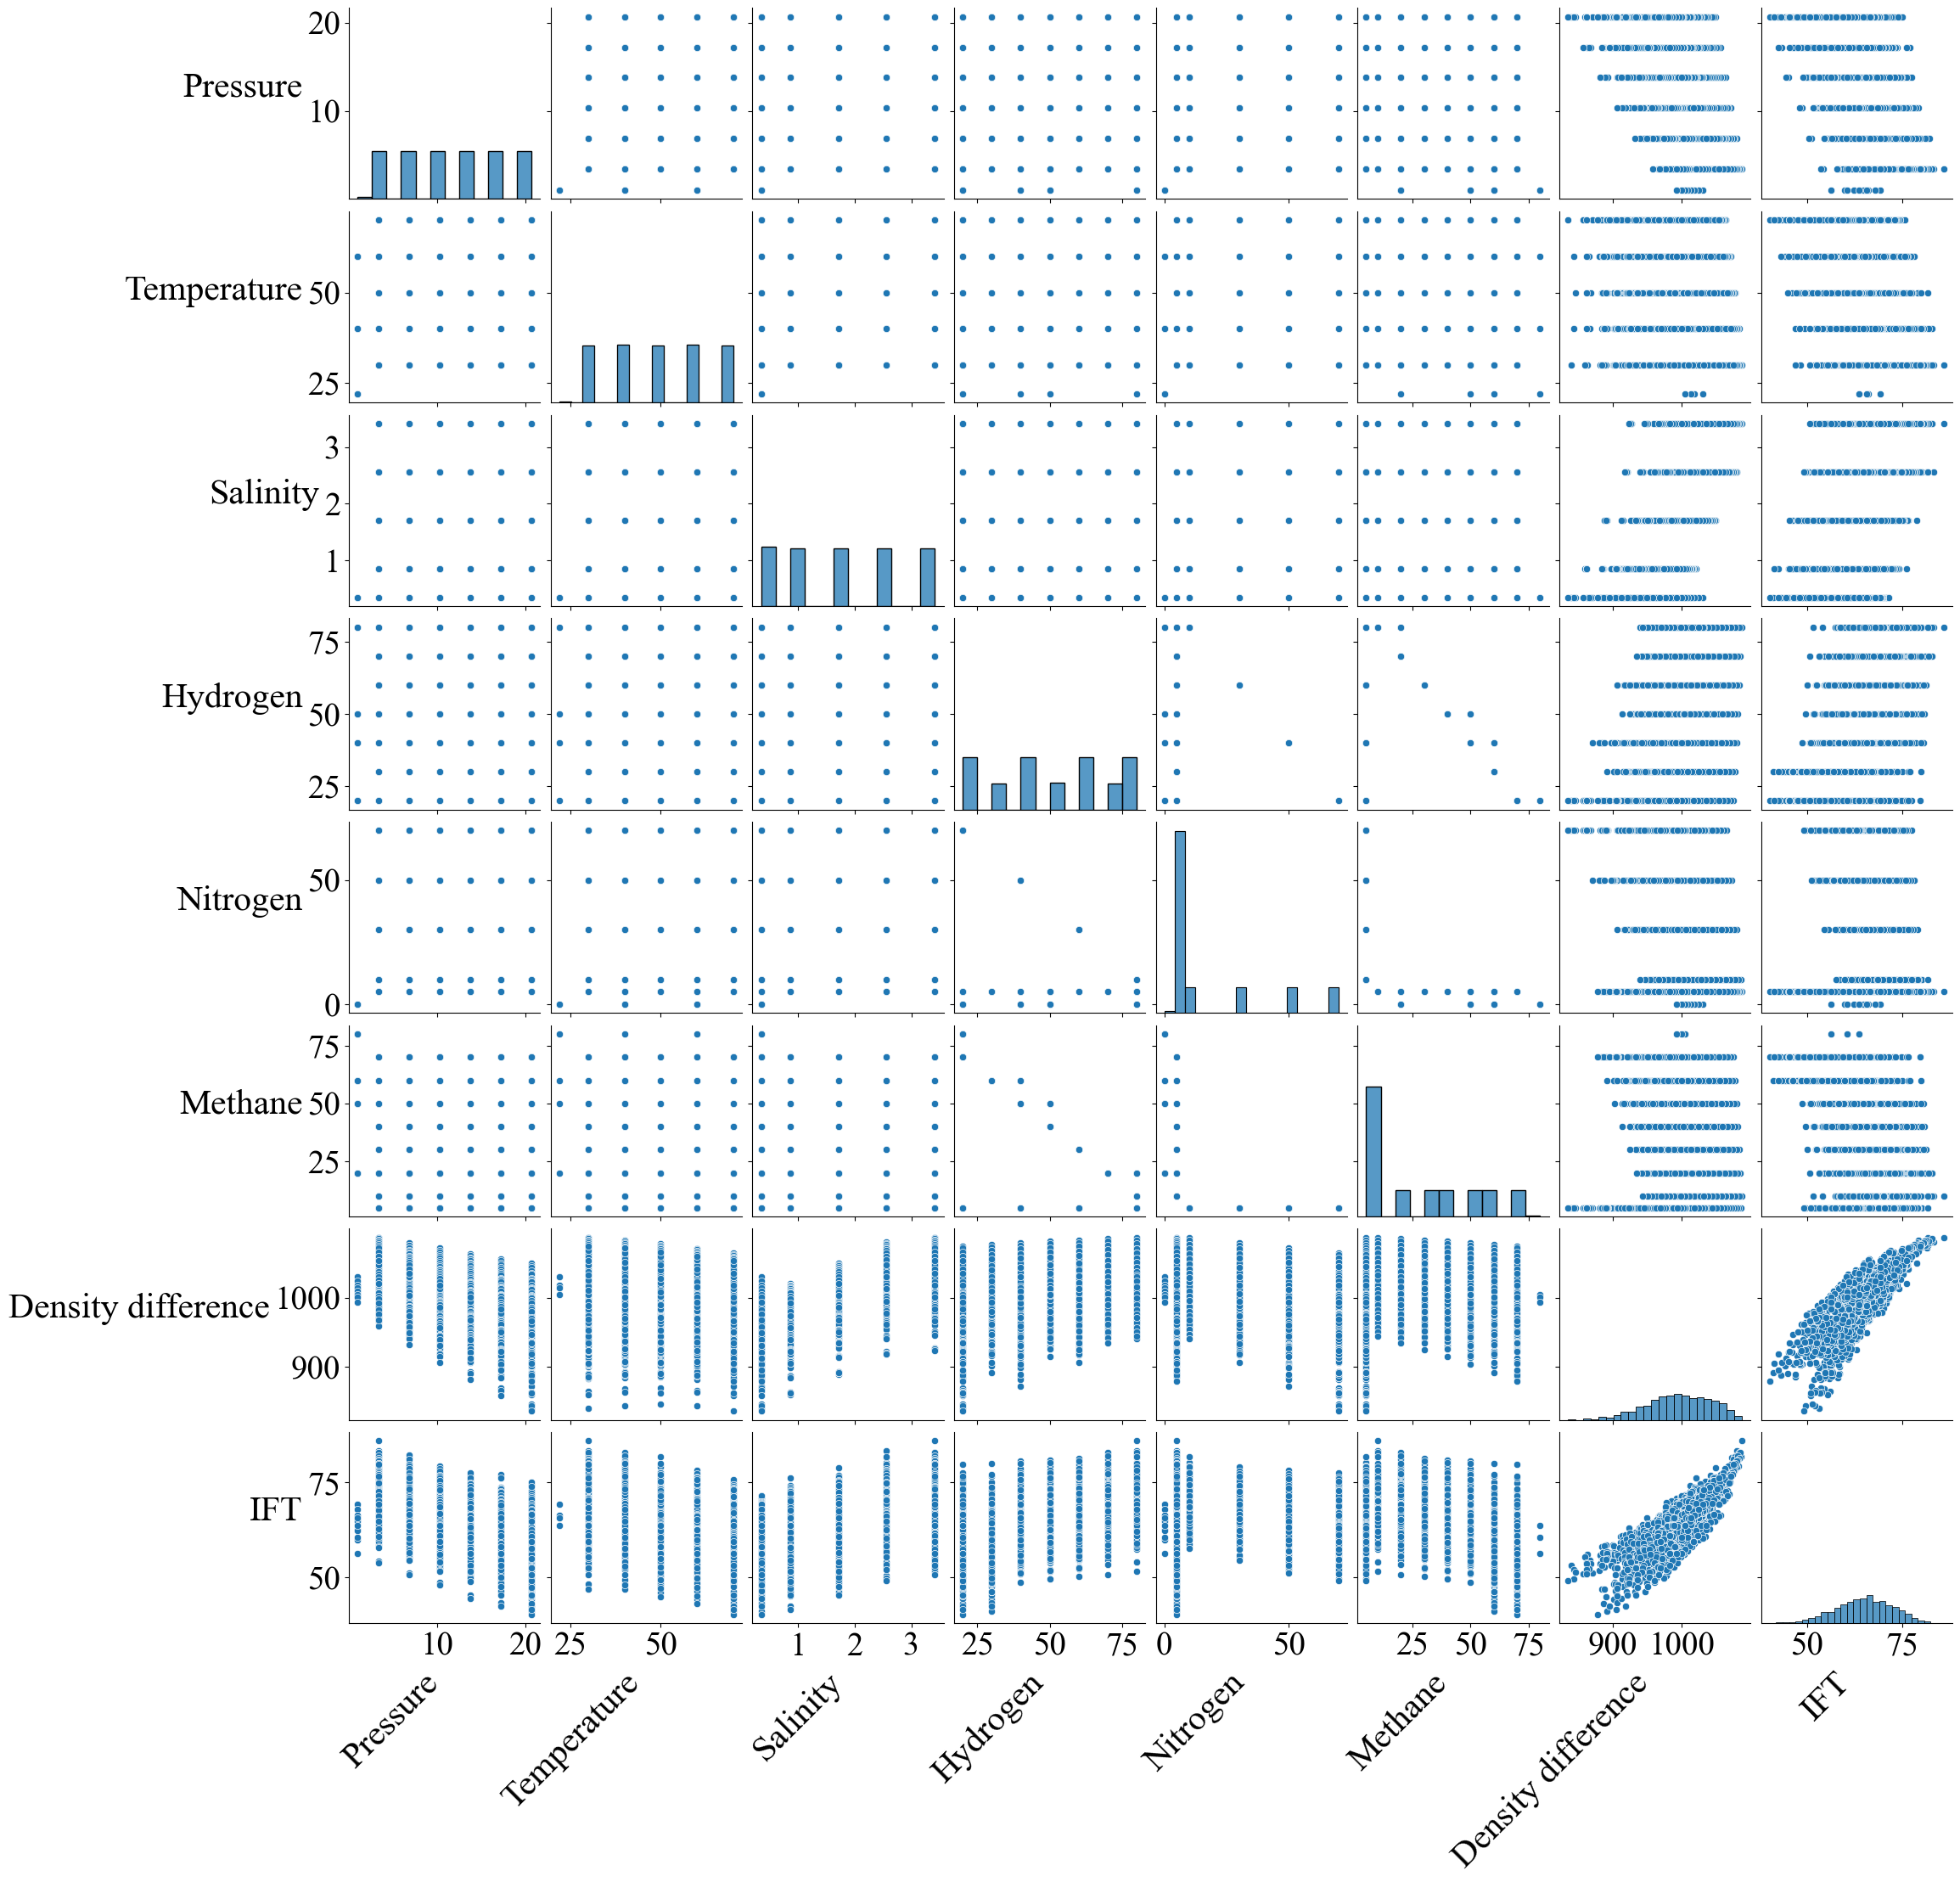

In [13]:
pairplot = sns.pairplot(df, diag_kind='hist')
    
# x-axis customization
for ax in pairplot.axes.flat:
    ax.xaxis.label.set_fontsize(30)
    ax.xaxis.label.set_rotation(45)
    ax.xaxis.label.set_ha('right')
    

# y-axis customization
for ax in pairplot.axes.flat:
    ax.yaxis.label.set_fontsize(30)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

for ax in pairplot.axes.flat:
    ax.tick_params(axis='both', labelsize=28)

# Svae figure
pairplot.savefig('Pairplot.png', bbox_inches='tight', pad_inches=0.1)

## Model reliability and statistical validity

The Leverage approach is employed to evaluate the model reliability and statistical validity of the dataset. In Leverage approach, the standardized residuals (SR) and hat value (H) of each instance is calculated. The transformed data is then categorized into different groups based on the proposed criteria in the literature:
|**Data group**      |             **Criteria**     | 
---------------------|------------------------------|
|Valid data |       0 $\le$ H $\le$ H$^*$ and -3 $\le$ SR $\le$ 3|
|Vertical suspect data|  0 $\le$ H $\le$ H$^*$ and SR $\le$ -3 or SR $\ge$ 3|
|Good leverage data|   H > H$^*$ and -3 $\le$ SR $\le$ 3
|Bad leverage data|    H > H$^*$ and SR < -3 or SR > 3|

In [14]:
# Dependent and independent variables
X= df. drop(['IFT'],axis=1)
y=df['IFT'].astype(float)

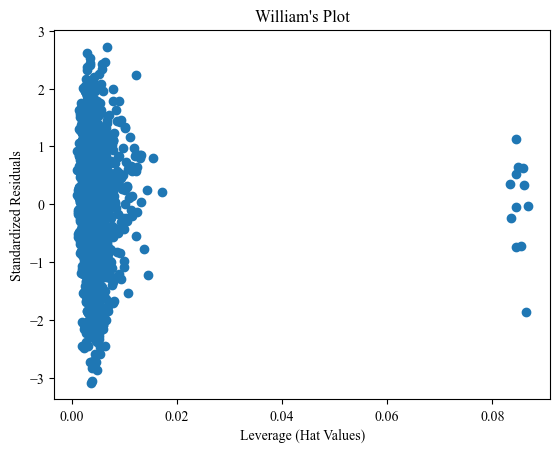

In [15]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Leverage values
leverage = model.get_influence().hat_matrix_diag

# Standardized residuals
standardized_residuals = model.get_influence().resid_studentized_external

data = pd.DataFrame({'Leverage (Hat Values)': leverage, 'Standardized Residuals': standardized_residuals})

data.to_excel('Williams_plot.xlsx', index=False)

# William's Plot
plt.scatter(leverage, standardized_residuals)
plt.xlabel("Leverage (Hat Values)")
plt.ylabel("Standardized Residuals")
plt.title("William's Plot")
plt.show()